### A script to run all types of input for this model

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Base paths for input and output
base_input_path = "./Training_data/input_data"
base_output_path = "./Training_data/output_data"

# Define methods and categories
methods = ["Variance"]
# methods = ["Variance", "RFE"]

categories = ["B", "S", "D", "K"]

In [3]:
# Function to preprocess data
def preprocess_data(input_path, output_path):
    # Load input and output data
    input_data = pd.read_csv(input_path, header=None, skiprows=1)
    output_data = pd.read_csv(output_path, header=None, skiprows=1)

    # Normalize input data
    scaler = MinMaxScaler()
    input_data_normalized = scaler.fit_transform(input_data)

    # Handle NaN values
    imputer = SimpleImputer(strategy='mean')
    input_data_imputed = imputer.fit_transform(input_data_normalized)

    # One-hot encode output data
    output_labels = output_data[0].values
    output_data_encoded = pd.get_dummies(output_labels, dtype=np.float32).values

    # Reshape input data for CNN
    input_data_reshaped = input_data_imputed.reshape((input_data_imputed.shape[0], input_data_imputed.shape[1], 1))

    return input_data_reshaped, output_data_encoded

# Function to build the model
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Processing Variance -> B -> File 1


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for Variance -> B -> File 1...
Epoch 1/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5676 - loss: 0.9945 - val_accuracy: 0.7765 - val_loss: 0.5718
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7732 - loss: 0.5488 - val_accuracy: 0.8284 - val_loss: 0.4498
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8246 - loss: 0.4458 - val_accuracy: 0.8392 - val_loss: 0.4009
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8468 - loss: 0.3775 - val_accuracy: 0.8594 - val_loss: 0.3977
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8740 - loss: 0.3475 - val_accuracy: 0.8587 - val_loss: 0.3411
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8837 - loss: 0.3017 - val_accuracy: 0.8695 - val_loss: 0.3172
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8992 - loss: 0.2681 - val_accuracy: 0.8933 - val_loss: 0.2848
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 10m

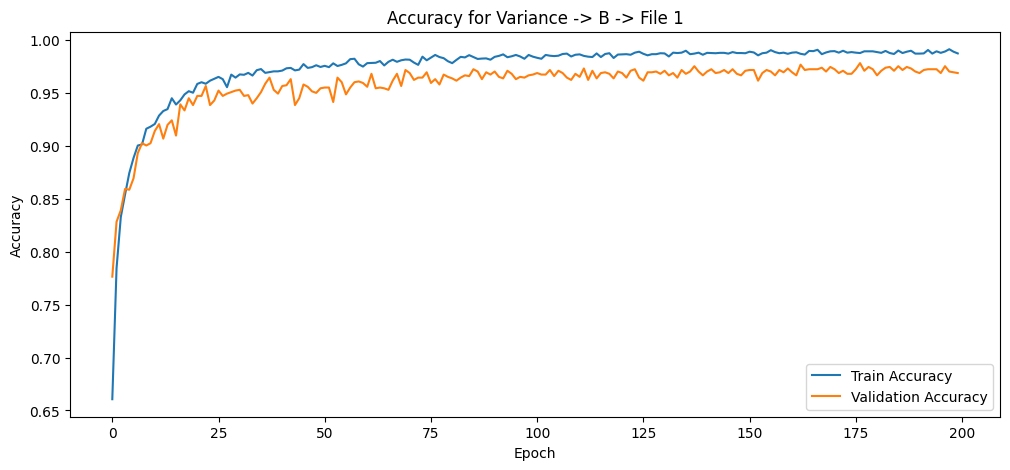

Processing Variance -> B -> File 2
Training model for Variance -> B -> File 2...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5233 - loss: 1.0927 - val_accuracy: 0.7433 - val_loss: 0.6830
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7274 - loss: 0.6289 - val_accuracy: 0.7722 - val_loss: 0.5525
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7745 - loss: 0.5322 - val_accuracy: 0.8097 - val_loss: 0.4534
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8148 - loss: 0.4560 - val_accuracy: 0.8407 - val_loss: 0.4226
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8261 - loss: 0.4240 - val_accuracy: 0.8421 - val_loss: 0.3937
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8486 - loss: 0.3855 - val_accuracy: 0.8515 - val_loss: 0.3631
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8573 - loss: 0.3561 - val_accuracy: 0.8702 - val_loss: 0.3489
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8700 - loss: 0.3333 - val_accuracy: 0.878

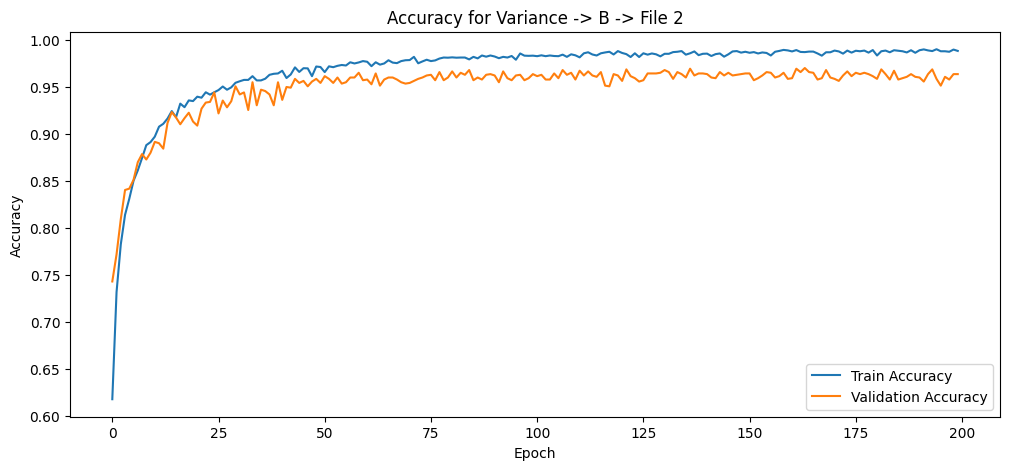

Processing Variance -> B -> File 3
Training model for Variance -> B -> File 3...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5366 - loss: 1.0532 - val_accuracy: 0.7167 - val_loss: 0.6576
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7265 - loss: 0.6462 - val_accuracy: 0.7801 - val_loss: 0.5228
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7809 - loss: 0.5330 - val_accuracy: 0.8075 - val_loss: 0.4564
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8185 - loss: 0.4536 - val_accuracy: 0.8435 - val_loss: 0.4005
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8418 - loss: 0.4032 - val_accuracy: 0.8515 - val_loss: 0.3864
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8667 - loss: 0.3554 - val_accuracy: 0.8558 - val_loss: 0.3577
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8638 - loss: 0.3552 - val_accuracy: 0.8652 - val_loss: 0.3416
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8847 - loss: 0.2947 - val_accuracy: 0.8760

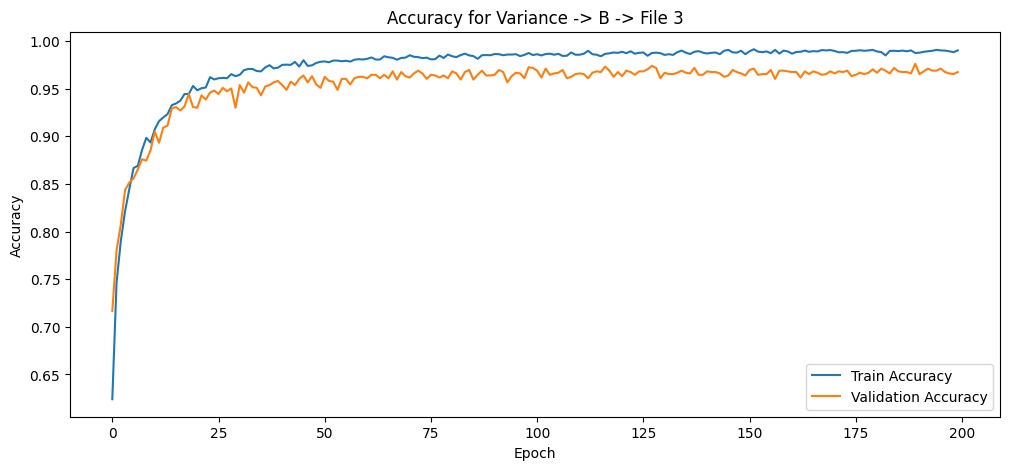

Processing Variance -> B -> File 4
Training model for Variance -> B -> File 4...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5103 - loss: 1.0760 - val_accuracy: 0.6503 - val_loss: 0.7234
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7172 - loss: 0.6477 - val_accuracy: 0.7714 - val_loss: 0.5632
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7741 - loss: 0.5525 - val_accuracy: 0.8147 - val_loss: 0.4600
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7961 - loss: 0.4940 - val_accuracy: 0.7924 - val_loss: 0.4685
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8312 - loss: 0.4242 - val_accuracy: 0.8349 - val_loss: 0.4055
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8385 - loss: 0.3979 - val_accuracy: 0.8702 - val_loss: 0.3711
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8690 - loss: 0.3386 - val_accuracy: 0.8378 - val_loss: 0.3811
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8675 - loss: 0.3297 - val_accuracy: 0.8897

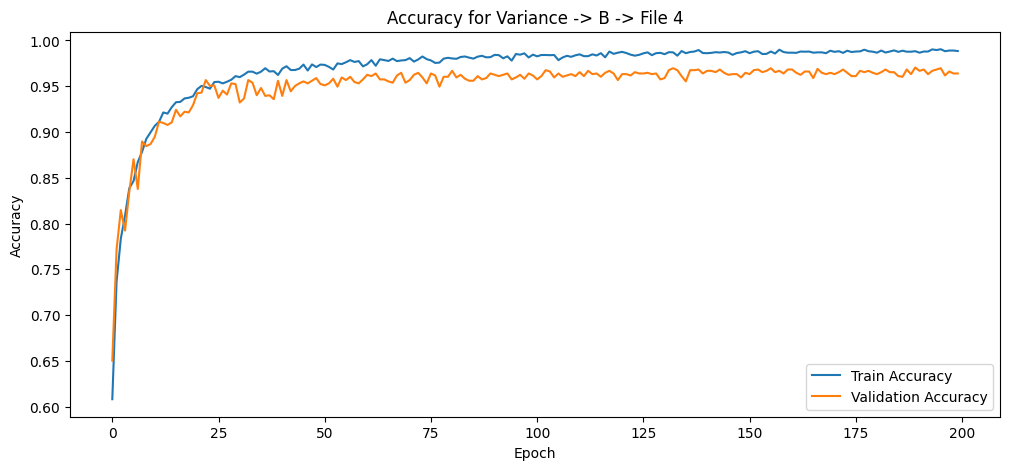

Processing Variance -> B -> File 5
Training model for Variance -> B -> File 5...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5039 - loss: 1.0740 - val_accuracy: 0.7318 - val_loss: 0.6358
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7320 - loss: 0.6436 - val_accuracy: 0.7614 - val_loss: 0.5662
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7918 - loss: 0.5178 - val_accuracy: 0.7895 - val_loss: 0.4848
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8111 - loss: 0.4540 - val_accuracy: 0.8385 - val_loss: 0.4164
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8432 - loss: 0.3977 - val_accuracy: 0.8544 - val_loss: 0.3661
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8547 - loss: 0.3678 - val_accuracy: 0.8681 - val_loss: 0.3523
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8688 - loss: 0.3224 - val_accuracy: 0.8616 - val_loss: 0.3721
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8640 - loss: 0.3181 - val_accuracy: 0.8846

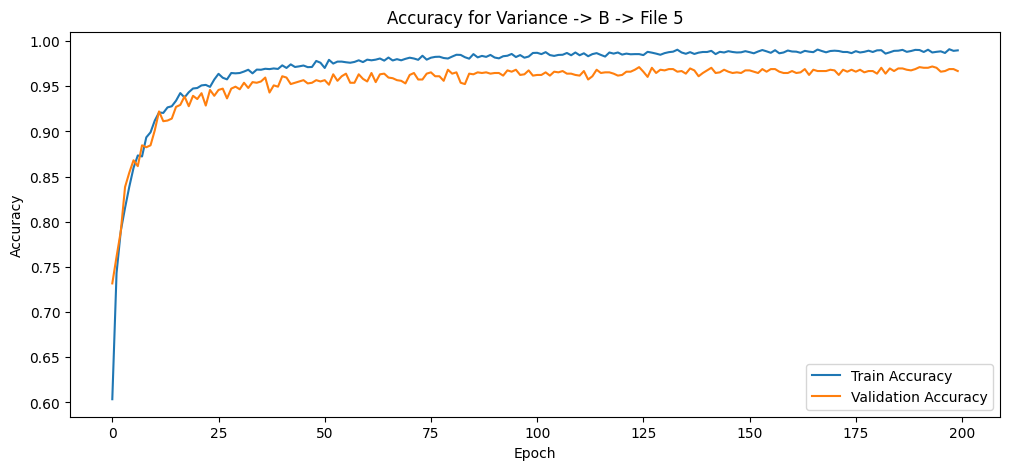

Processing Variance -> B -> File 6
Training model for Variance -> B -> File 6...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5080 - loss: 1.1032 - val_accuracy: 0.7174 - val_loss: 0.6444
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7361 - loss: 0.6165 - val_accuracy: 0.7967 - val_loss: 0.5184
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7868 - loss: 0.5342 - val_accuracy: 0.8032 - val_loss: 0.4758
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8133 - loss: 0.4732 - val_accuracy: 0.8205 - val_loss: 0.4549
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8315 - loss: 0.4211 - val_accuracy: 0.8399 - val_loss: 0.4014
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8456 - loss: 0.3753 - val_accuracy: 0.8529 - val_loss: 0.4084
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8596 - loss: 0.3479 - val_accuracy: 0.8702 - val_loss: 0.3475
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8785 - loss: 0.3207 - val_accuracy: 0.8745

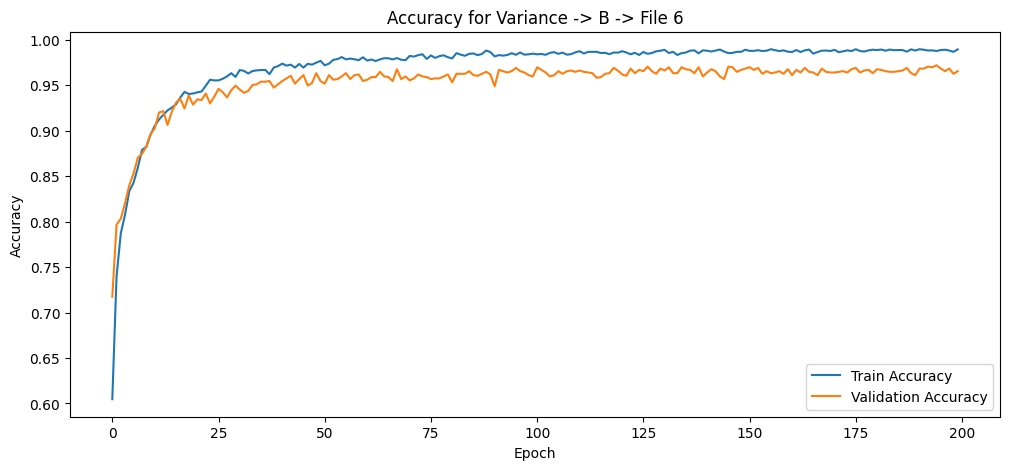

Processing Variance -> S -> File 1


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for Variance -> S -> File 1...
Epoch 1/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4676 - loss: 1.1752 - val_accuracy: 0.6490 - val_loss: 0.8608
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6594 - loss: 0.8428 - val_accuracy: 0.6948 - val_loss: 0.7673
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7024 - loss: 0.7444 - val_accuracy: 0.7028 - val_loss: 0.7383
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7142 - loss: 0.6875 - val_accuracy: 0.7277 - val_loss: 0.6825
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7395 - loss: 0.6624 - val_accuracy: 0.7261 - val_loss: 0.6756
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7497 - loss: 0.6128 - val_accuracy: 0.7357 - val_loss: 0.6509
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7690 - loss: 0.5788 - val_accuracy: 0.7398 - val_loss: 0.6069
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 

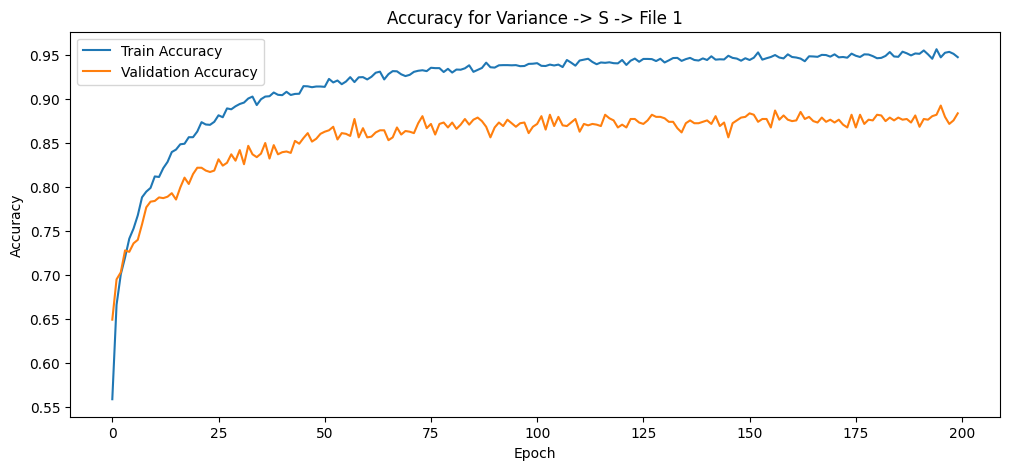

Processing Variance -> S -> File 2


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for Variance -> S -> File 2...
Epoch 1/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4743 - loss: 1.1699 - val_accuracy: 0.6233 - val_loss: 0.8707
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6564 - loss: 0.8306 - val_accuracy: 0.6843 - val_loss: 0.7758
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6875 - loss: 0.7642 - val_accuracy: 0.6980 - val_loss: 0.7288
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7189 - loss: 0.7014 - val_accuracy: 0.7116 - val_loss: 0.7032
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7383 - loss: 0.6370 - val_accuracy: 0.7293 - val_loss: 0.6551
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7457 - loss: 0.6270 - val_accuracy: 0.7365 - val_loss: 0.6555
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7683 - loss: 0.5768 - val_accuracy: 0.7510 - val_loss: 0.6205
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 

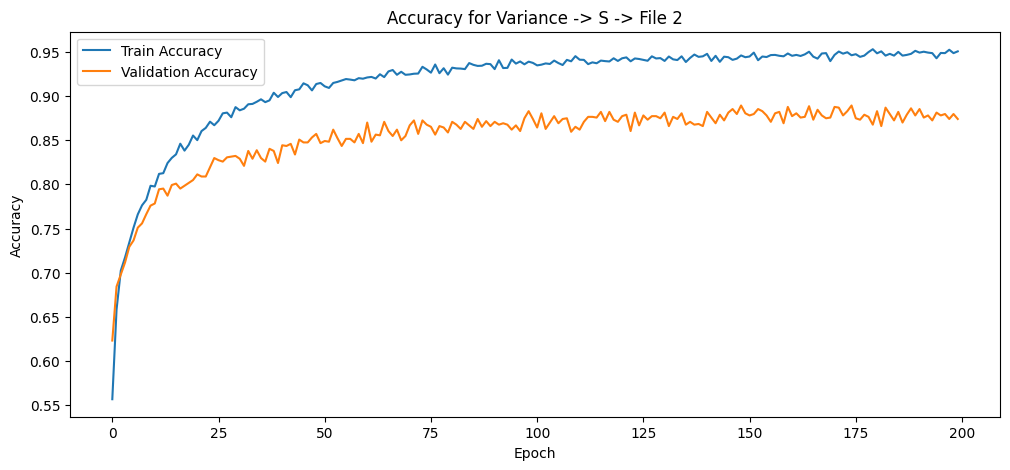

Processing Variance -> S -> File 3
Training model for Variance -> S -> File 3...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4650 - loss: 1.1814 - val_accuracy: 0.6241 - val_loss: 0.9087
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6289 - loss: 0.8944 - val_accuracy: 0.6635 - val_loss: 0.7936
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6797 - loss: 0.7908 - val_accuracy: 0.6908 - val_loss: 0.7501
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7065 - loss: 0.7206 - val_accuracy: 0.6956 - val_loss: 0.6970
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7224 - loss: 0.6737 - val_accuracy: 0.7149 - val_loss: 0.6699
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7368 - loss: 0.6381 - val_accuracy: 0.7221 - val_loss: 0.6790
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7407 - loss: 0.6246 - val_accuracy: 0.7357 - val_loss: 0.6516
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7586 - loss: 0.6008 - val_accuracy: 0.729

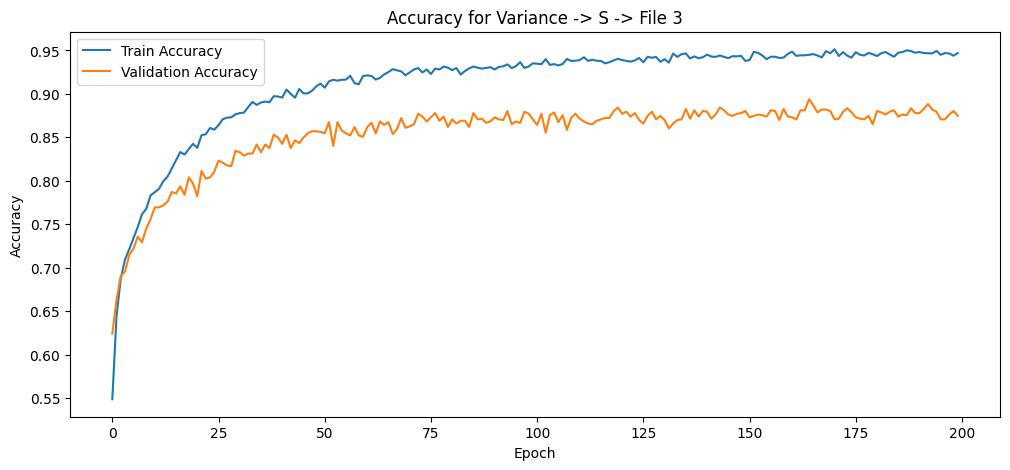

Processing Variance -> S -> File 4
Training model for Variance -> S -> File 4...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4559 - loss: 1.2098 - val_accuracy: 0.6080 - val_loss: 0.9273
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6213 - loss: 0.8972 - val_accuracy: 0.6586 - val_loss: 0.8147
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6720 - loss: 0.7883 - val_accuracy: 0.6659 - val_loss: 0.7682
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.7267 - val_accuracy: 0.6996 - val_loss: 0.7243
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7249 - loss: 0.6903 - val_accuracy: 0.7036 - val_loss: 0.7005
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7385 - loss: 0.6437 - val_accuracy: 0.7149 - val_loss: 0.6786
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7331 - loss: 0.6455 - val_accuracy: 0.7293 - val_loss: 0.6564
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7518 - loss: 0.6152 - val_accuracy: 0.7349

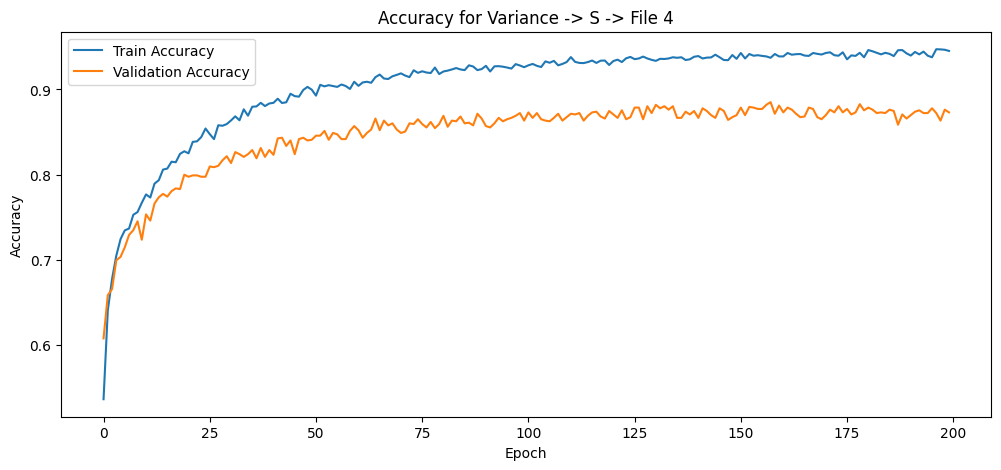

Processing Variance -> S -> File 5
Training model for Variance -> S -> File 5...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4790 - loss: 1.1882 - val_accuracy: 0.6161 - val_loss: 0.8993
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6321 - loss: 0.8714 - val_accuracy: 0.6570 - val_loss: 0.7944
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6820 - loss: 0.7718 - val_accuracy: 0.6835 - val_loss: 0.7495
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7077 - loss: 0.7163 - val_accuracy: 0.6884 - val_loss: 0.7292
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7253 - loss: 0.6969 - val_accuracy: 0.7181 - val_loss: 0.6875
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7330 - loss: 0.6613 - val_accuracy: 0.6996 - val_loss: 0.7350
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7604 - loss: 0.6165 - val_accuracy: 0.7092 - val_loss: 0.6799
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7496 - loss: 0.6084 - val_accuracy: 0.7349

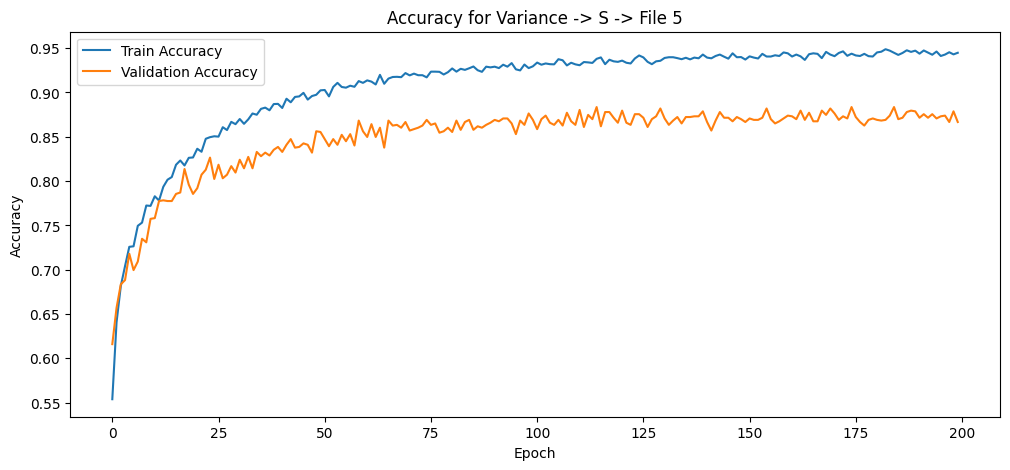

Processing Variance -> S -> File 6
Training model for Variance -> S -> File 6...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4473 - loss: 1.1956 - val_accuracy: 0.6185 - val_loss: 0.8974
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6262 - loss: 0.8836 - val_accuracy: 0.6265 - val_loss: 0.8653
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6793 - loss: 0.7815 - val_accuracy: 0.6699 - val_loss: 0.7703
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.7325 - val_accuracy: 0.6924 - val_loss: 0.7457
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7224 - loss: 0.6944 - val_accuracy: 0.6956 - val_loss: 0.7201
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7373 - loss: 0.6567 - val_accuracy: 0.7036 - val_loss: 0.7146
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7282 - loss: 0.6643 - val_accuracy: 0.7197 - val_loss: 0.6630
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7439 - loss: 0.6324 - val_accuracy: 0.7301

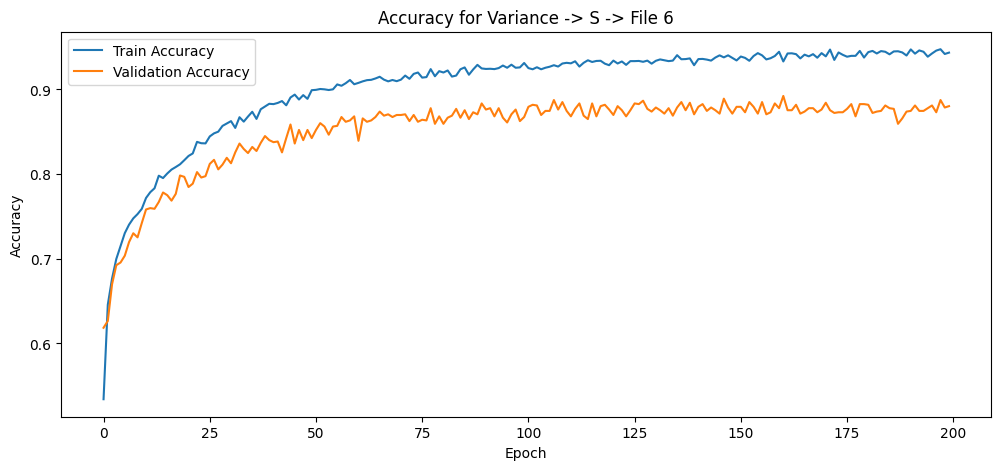

Processing Variance -> D -> File 1
Training model for Variance -> D -> File 1...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5936 - loss: 0.8848 - val_accuracy: 0.7960 - val_loss: 0.4919
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7906 - loss: 0.5044 - val_accuracy: 0.8345 - val_loss: 0.4050
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8182 - loss: 0.4340 - val_accuracy: 0.8577 - val_loss: 0.3470
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8469 - loss: 0.3789 - val_accuracy: 0.8775 - val_loss: 0.3172
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8672 - loss: 0.3418 - val_accuracy: 0.8556 - val_loss: 0.3351
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8785 - loss: 0.3154 - val_accuracy: 0.8879 - val_loss: 0.2768
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8840 - loss: 0.2976 - val_accuracy: 0.8920 - val_loss: 0.2735
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8948 - loss: 0.2726 - val_accuracy: 0.88

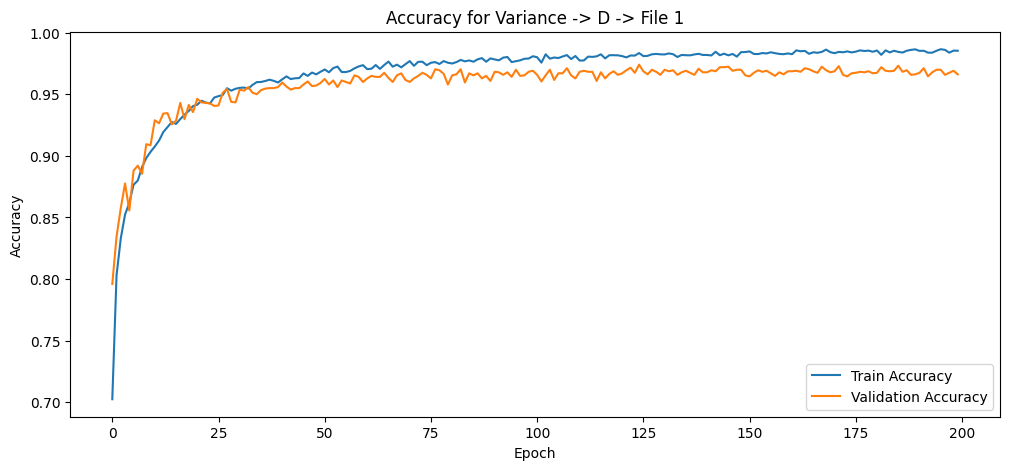

Processing Variance -> D -> File 2
Training model for Variance -> D -> File 2...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5953 - loss: 0.9270 - val_accuracy: 0.7778 - val_loss: 0.5274
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7891 - loss: 0.5112 - val_accuracy: 0.8320 - val_loss: 0.4246
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8179 - loss: 0.4582 - val_accuracy: 0.8477 - val_loss: 0.3980
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8419 - loss: 0.3980 - val_accuracy: 0.8730 - val_loss: 0.3325
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8567 - loss: 0.3667 - val_accuracy: 0.8701 - val_loss: 0.3391
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8664 - loss: 0.3381 - val_accuracy: 0.8974 - val_loss: 0.2802
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8742 - loss: 0.3287 - val_accuracy: 0.8953 - val_loss: 0.2726
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8928 - loss: 0.2967 - val_accuracy: 0.889

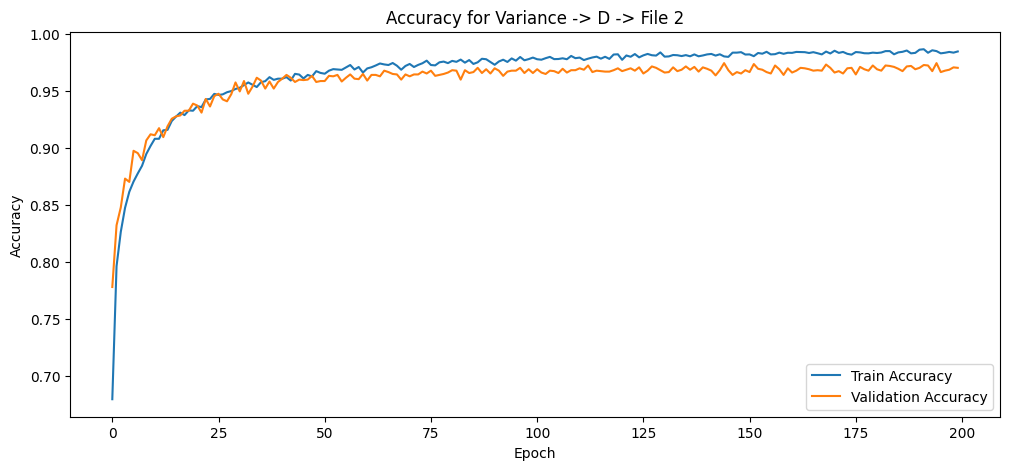

Processing Variance -> D -> File 3


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for Variance -> D -> File 3...
Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5699 - loss: 1.0000 - val_accuracy: 0.7650 - val_loss: 0.5586
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7721 - loss: 0.5537 - val_accuracy: 0.8155 - val_loss: 0.4477
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7995 - loss: 0.4894 - val_accuracy: 0.8448 - val_loss: 0.4074
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8292 - loss: 0.4244 - val_accuracy: 0.8407 - val_loss: 0.4030
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8404 - loss: 0.3917 - val_accuracy: 0.8560 - val_loss: 0.3678
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8595 - loss: 0.3565 - val_accuracy: 0.8767 - val_loss: 0.3135
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8741 - loss: 0.3256 - val_accuracy: 0.8792 - val_loss: 0.3101
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/st

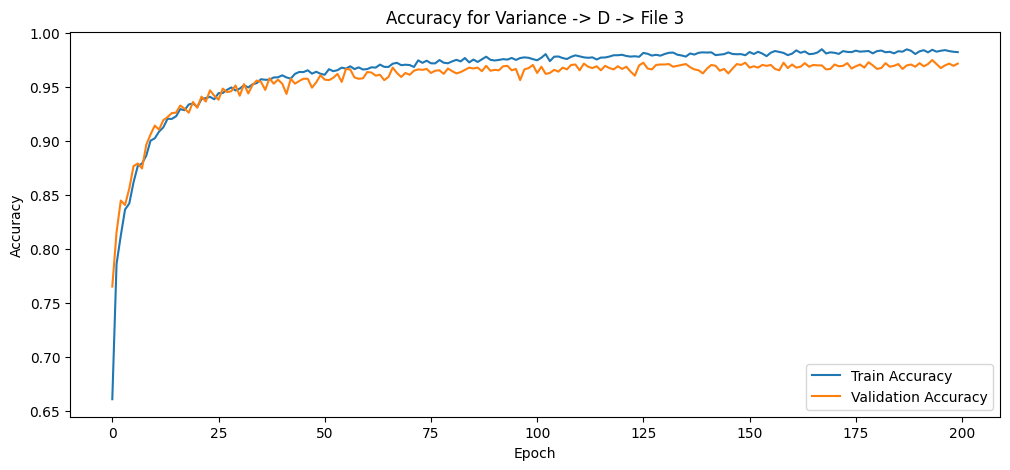

Processing Variance -> D -> File 4
Training model for Variance -> D -> File 4...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5843 - loss: 0.9792 - val_accuracy: 0.7700 - val_loss: 0.5661
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7643 - loss: 0.5584 - val_accuracy: 0.8283 - val_loss: 0.4695
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8079 - loss: 0.4677 - val_accuracy: 0.8407 - val_loss: 0.4085
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8286 - loss: 0.4372 - val_accuracy: 0.8436 - val_loss: 0.3999
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8420 - loss: 0.4003 - val_accuracy: 0.8693 - val_loss: 0.3382
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8559 - loss: 0.3677 - val_accuracy: 0.8767 - val_loss: 0.3201
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8714 - loss: 0.3363 - val_accuracy: 0.8850 - val_loss: 0.2913
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8771 - loss: 0.3197 - val_accuracy: 0.8784

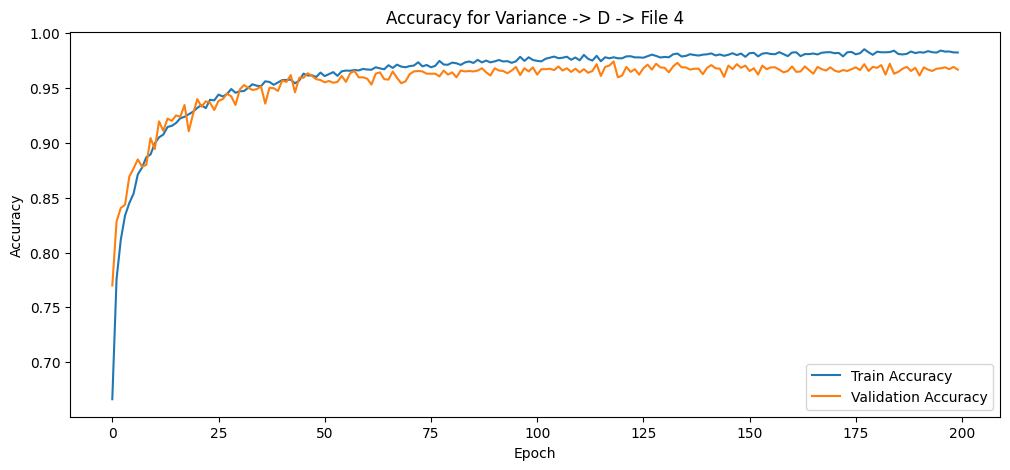

Processing Variance -> D -> File 5
Training model for Variance -> D -> File 5...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5715 - loss: 0.9829 - val_accuracy: 0.7613 - val_loss: 0.5635
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7648 - loss: 0.5659 - val_accuracy: 0.7935 - val_loss: 0.4830
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7968 - loss: 0.4887 - val_accuracy: 0.8258 - val_loss: 0.4172
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8307 - loss: 0.4297 - val_accuracy: 0.8283 - val_loss: 0.4216
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8492 - loss: 0.3917 - val_accuracy: 0.8643 - val_loss: 0.3510
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8507 - loss: 0.3815 - val_accuracy: 0.8688 - val_loss: 0.3421
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8674 - loss: 0.3494 - val_accuracy: 0.8804 - val_loss: 0.3083
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8762 - loss: 0.3187 - val_accuracy: 0.8949

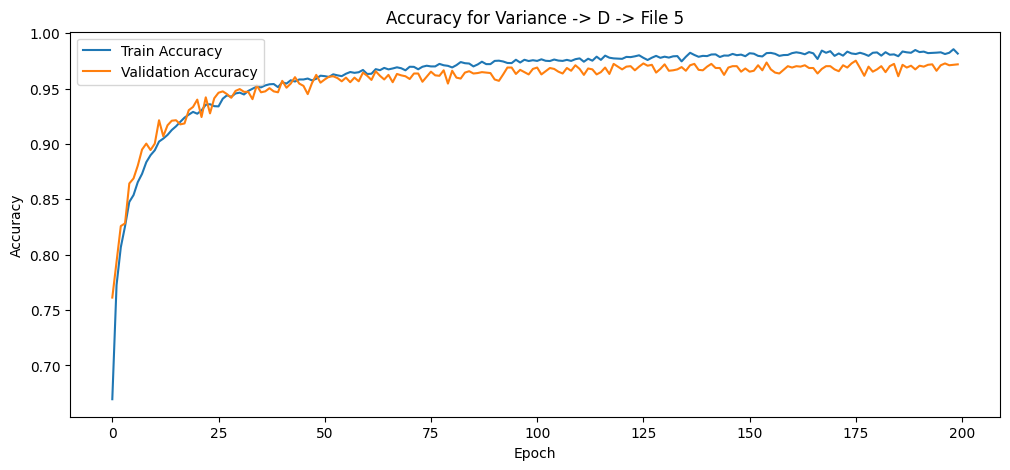

Processing Variance -> D -> File 6
Training model for Variance -> D -> File 6...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5666 - loss: 0.9998 - val_accuracy: 0.7642 - val_loss: 0.5577
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7635 - loss: 0.5671 - val_accuracy: 0.8188 - val_loss: 0.4848
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7981 - loss: 0.4867 - val_accuracy: 0.8130 - val_loss: 0.4643
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8115 - loss: 0.4540 - val_accuracy: 0.8515 - val_loss: 0.3721
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8351 - loss: 0.4079 - val_accuracy: 0.8647 - val_loss: 0.3570
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8477 - loss: 0.3803 - val_accuracy: 0.8751 - val_loss: 0.3296
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8575 - loss: 0.3657 - val_accuracy: 0.8833 - val_loss: 0.3021
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8756 - loss: 0.3308 - val_accuracy: 0.8866

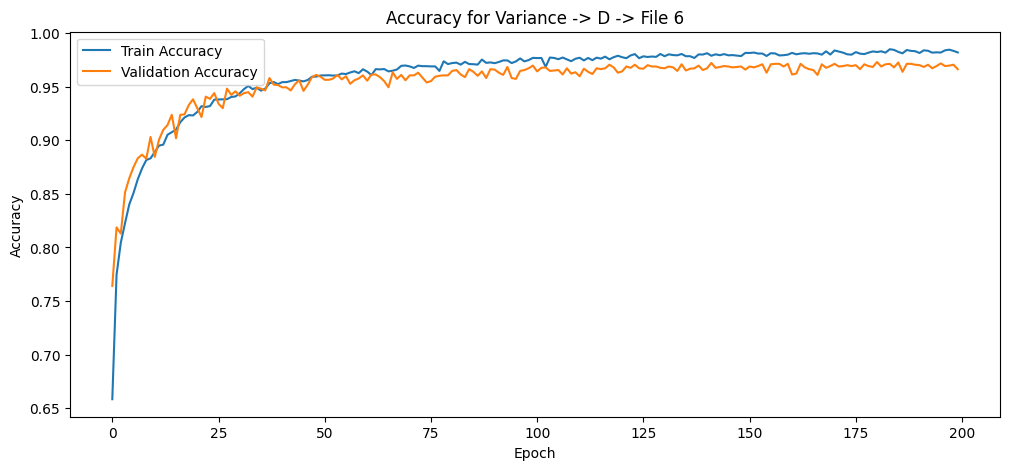

Processing Variance -> K -> File 1
Training model for Variance -> K -> File 1...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3751 - loss: 1.3158 - val_accuracy: 0.5984 - val_loss: 1.0174
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5946 - loss: 0.9694 - val_accuracy: 0.6324 - val_loss: 0.8800
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6665 - loss: 0.8102 - val_accuracy: 0.6773 - val_loss: 0.7926
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7150 - loss: 0.7254 - val_accuracy: 0.7143 - val_loss: 0.7306
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7248 - loss: 0.6811 - val_accuracy: 0.7383 - val_loss: 0.6625
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7426 - loss: 0.6451 - val_accuracy: 0.7163 - val_loss: 0.6649
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7542 - loss: 0.6166 - val_accuracy: 0.7652 - val_loss: 0.6050
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7746 - loss: 0.5742 - val_accuracy

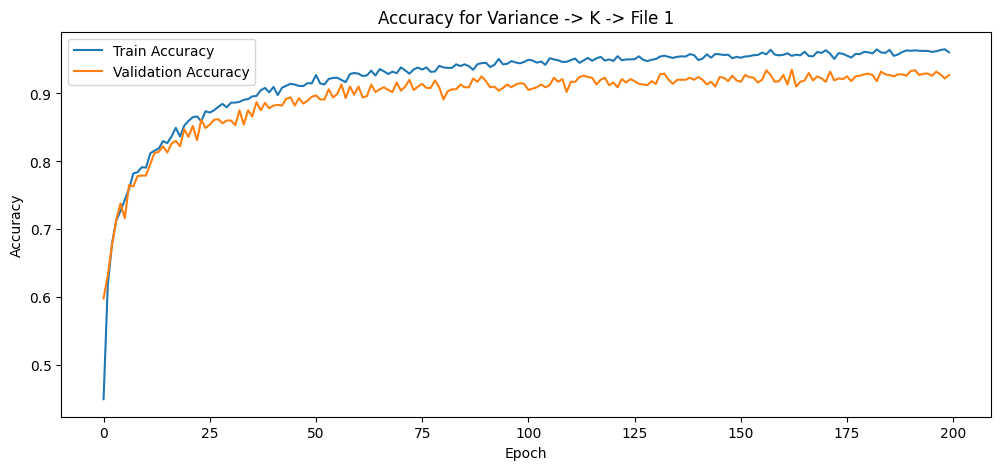

Processing Variance -> K -> File 2


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for Variance -> K -> File 2...
Epoch 1/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3416 - loss: 1.3364 - val_accuracy: 0.5105 - val_loss: 1.1154
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5185 - loss: 1.0844 - val_accuracy: 0.6064 - val_loss: 0.9157
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6414 - loss: 0.8855 - val_accuracy: 0.6723 - val_loss: 0.8304
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6701 - loss: 0.7985 - val_accuracy: 0.6873 - val_loss: 0.7683
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7122 - loss: 0.7298 - val_accuracy: 0.6833 - val_loss: 0.7522
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7233 - loss: 0.6895 - val_accuracy: 0.7233 - val_loss: 0.6810
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7468 - loss: 0.6576 - val_accuracy: 0.7193 - val_loss: 0.6850
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 

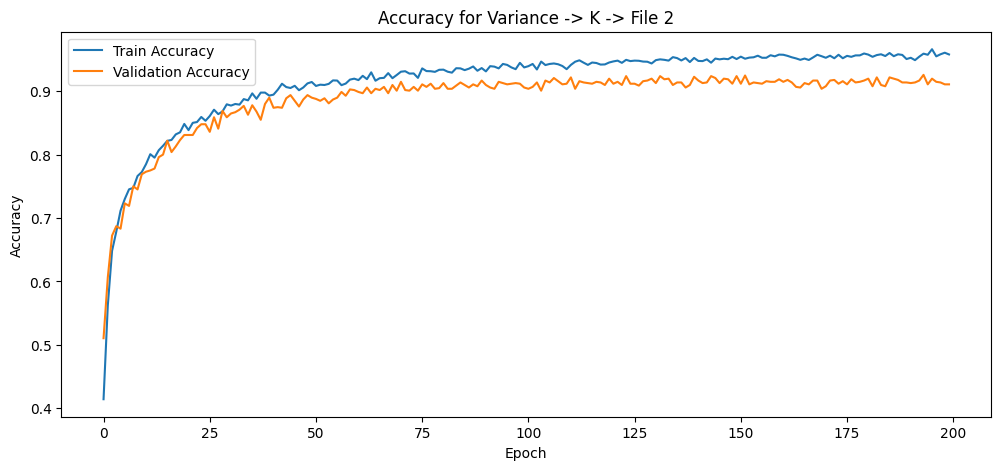

Processing Variance -> K -> File 3


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for Variance -> K -> File 3...
Epoch 1/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3499 - loss: 1.3330 - val_accuracy: 0.5235 - val_loss: 1.0929
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5441 - loss: 1.0777 - val_accuracy: 0.6164 - val_loss: 0.9394
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6154 - loss: 0.9295 - val_accuracy: 0.6334 - val_loss: 0.8700
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6473 - loss: 0.8331 - val_accuracy: 0.6613 - val_loss: 0.8006
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6765 - loss: 0.7866 - val_accuracy: 0.6943 - val_loss: 0.7257
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7046 - loss: 0.7263 - val_accuracy: 0.7033 - val_loss: 0.7003
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7357 - loss: 0.6775 - val_accuracy: 0.7293 - val_loss: 0.6520
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/st

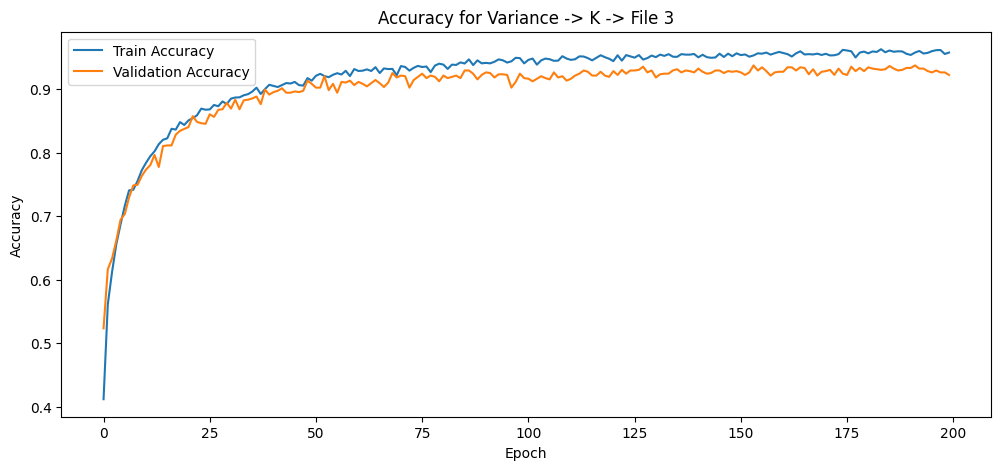

Processing Variance -> K -> File 4


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for Variance -> K -> File 4...
Epoch 1/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3563 - loss: 1.3464 - val_accuracy: 0.4985 - val_loss: 1.1505
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5204 - loss: 1.1047 - val_accuracy: 0.5604 - val_loss: 0.9772
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5753 - loss: 0.9701 - val_accuracy: 0.6384 - val_loss: 0.8890
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6278 - loss: 0.8937 - val_accuracy: 0.6474 - val_loss: 0.8163
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6406 - loss: 0.8350 - val_accuracy: 0.6843 - val_loss: 0.7761
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6910 - loss: 0.7632 - val_accuracy: 0.6843 - val_loss: 0.7482
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6967 - loss: 0.7398 - val_accuracy: 0.6883 - val_loss: 0.7369
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/st

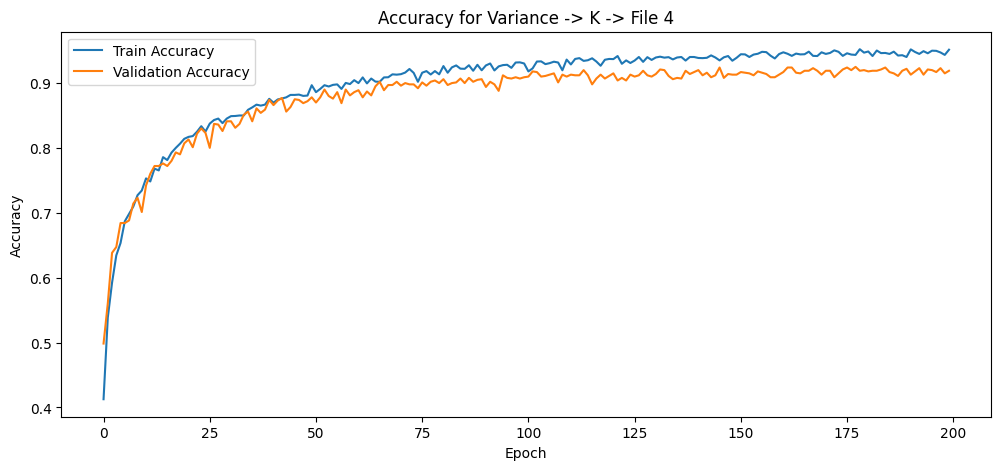

Processing Variance -> K -> File 5
Training model for Variance -> K -> File 5...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3486 - loss: 1.3351 - val_accuracy: 0.5015 - val_loss: 1.1353
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5141 - loss: 1.0970 - val_accuracy: 0.5544 - val_loss: 0.9851
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5940 - loss: 0.9412 - val_accuracy: 0.5984 - val_loss: 0.9015
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6388 - loss: 0.8425 - val_accuracy: 0.6563 - val_loss: 0.8254
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6749 - loss: 0.7962 - val_accuracy: 0.6573 - val_loss: 0.7941
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6952 - loss: 0.7336 - val_accuracy: 0.6893 - val_loss: 0.7687
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7052 - loss: 0.7294 - val_accuracy: 0.7003 - val_loss: 0.7167
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7409 - loss: 0.6584 - val_accuracy: 0.730

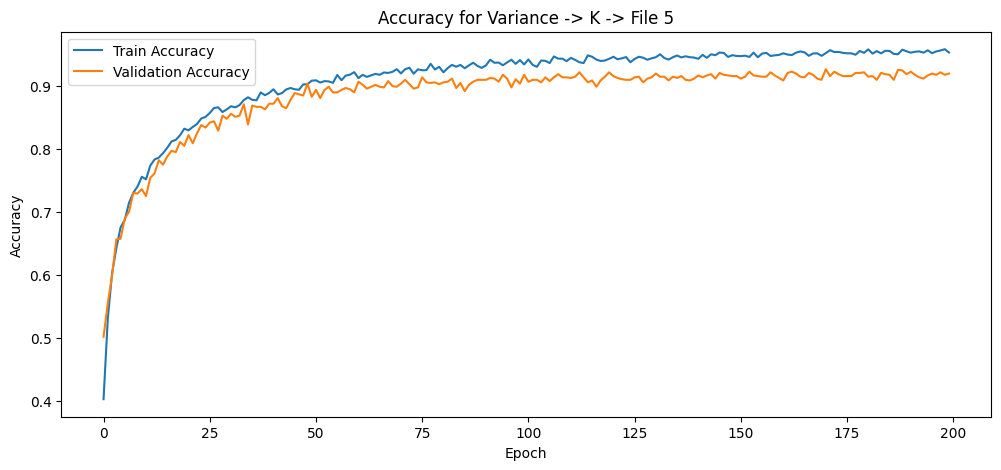

Processing Variance -> K -> File 6
Training model for Variance -> K -> File 6...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3233 - loss: 1.3587 - val_accuracy: 0.4486 - val_loss: 1.1864
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5019 - loss: 1.1308 - val_accuracy: 0.5674 - val_loss: 0.9941
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5962 - loss: 0.9670 - val_accuracy: 0.6344 - val_loss: 0.8547
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6286 - loss: 0.8717 - val_accuracy: 0.6553 - val_loss: 0.8425
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6760 - loss: 0.7752 - val_accuracy: 0.6993 - val_loss: 0.7253
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7078 - loss: 0.7271 - val_accuracy: 0.7273 - val_loss: 0.6804
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7286 - loss: 0.6995 - val_accuracy: 0.7103 - val_loss: 0.7215
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7286 - loss: 0.6870 - val_accuracy: 0.7403

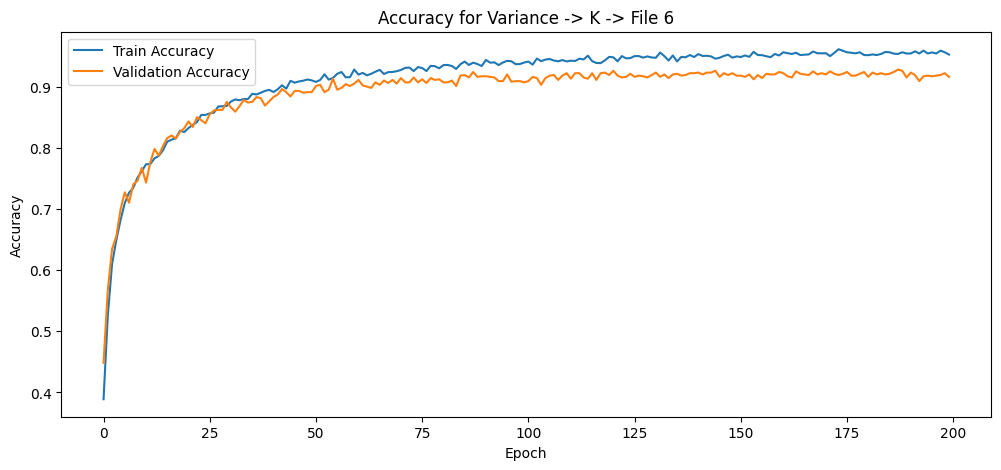

Model training and evaluation completed. Results saved to 'model_training_results.csv'.


In [4]:
# Initialize a list to store results
results = []

# Loop through methods, categories, and input files
for method in methods:
    for category in categories:
        output_file = os.path.join(base_output_path, f"output_cathepsin_{category}.csv")
        
        # Process all 3 input files for each category
        for file_index in range(1, 7):
            input_file = os.path.join(
                base_input_path, method, category, f"reduced_desc_{method}_{category}_{file_index}.csv"
            )
            
            print(f"Processing {method} -> {category} -> File {file_index}")

            # Preprocess the data
            input_data, output_data = preprocess_data(input_file, output_file)

            # Apply SMOTE to balance classes
            smote = SMOTE(sampling_strategy='auto', random_state=42)
            X_resampled, y_resampled = smote.fit_resample(
                input_data.reshape(input_data.shape[0], -1), output_data
            )
            X_resampled = X_resampled.reshape((X_resampled.shape[0], input_data.shape[1], 1))

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(
                X_resampled, y_resampled, test_size=0.2, random_state=42
            )

            # Build the model
            model = build_model(X_train.shape[1:], num_classes=output_data.shape[1])

            # Early stopping callback
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Train the model
            print(f"Training model for {method} -> {category} -> File {file_index}...")
            history = model.fit(
                X_train, y_train, 
                epochs=200, 
                batch_size=32, 
                validation_data=(X_test, y_test), 
                # callbacks=[early_stopping],
                verbose=1
            )

            # Evaluate the model
            test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
            print(f"Test accuracy for {method} -> {category} -> File {file_index}: {test_acc}")

            # Predict and generate classification report
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred_classes, output_dict=True)
            print(f"Classification Report for {method} -> {category} -> File {file_index}:")
            print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

            # Save result details for each iteration
            results.append({
                "Method": method,
                "Category": category,
                "File_Index": file_index,
                "Test_Accuracy": test_acc,
                "Precision": classification_rep['weighted avg']['precision'],
                "Recall": classification_rep['weighted avg']['recall'],
                "F1-Score": classification_rep['weighted avg']['f1-score']
            })

            # Plot training history
            plt.figure(figsize=(12, 5))
            plt.plot(history.history['accuracy'], label='Train Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.title(f"Accuracy for {method} -> {category} -> File {file_index}")
            plt.xlabel("Epoch")
            plt.ylabel("Accuracy")
            plt.legend()
            plt.show()

# Create a DataFrame to store all results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv("Final_results_Variance.csv", index=False)

print("Model training and evaluation completed. Results saved to 'model_training_results.csv'.")
